# Exploración del espacio químico mediante análisis de componentes principales (PCA) y agrupamiento.

In [2]:
# Importar librerias
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

from rdkit import Chem, DataStructs
from rdkit.Chem import Descriptors,Crippen

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

In [4]:
df=pd.read_excel('top5_np_classifier_class.xlsx', sheet_name='top5_np_classifier_class')

In [6]:
df.shape

(139, 44)

In [8]:
df1=pd.read_csv('oral.csv', index_col=0)

In [10]:
df1.head()

,MW,HBA,HBD,logP,TPSA,CSP3,NumRings,HetAtoms,RotBonds,np_classifier_class
0,346.141638,6,2,1.05760,93.06,0.473684,3,6,3,Guaiane sesquiterpenoids
1,342.110338,6,0,3.49440,67.13,0.210526,3,6,5,Flavones
2,416.125988,6,2,4.38150,93.06,0.120000,4,6,6,Chalcones
3,240.078644,3,0,3.26322,39.44,0.133333,3,3,1,Simple coumarins
4,274.120509,4,0,3.31890,48.67,0.312500,2,4,4,Simple coumarins


In [11]:
df1["canonical_smiles"] = df["canonical_smiles"].copy()

In [12]:
df1

,MW,HBA,HBD,logP,TPSA,CSP3,NumRings,HetAtoms,RotBonds,np_classifier_class,canonical_smiles
0,346.141638,6,2,1.05760,93.06,0.473684,3,6,3,Guaiane sesquiterpenoids,C=C(CO)C(=O)O[C@H]1CC(=C)[C@@H]2C[C@H](O)C(=C)...
1,342.110338,6,0,3.49440,67.13,0.210526,3,6,5,Flavones,COC1=CC=C(C2=CC(=O)C3=C(OC)C(OC)=C(OC)C=C3O2)C=C1
2,416.125988,6,2,4.38150,93.06,0.120000,4,6,6,Chalcones,COC1=C(C(=O)CCC2=CC=CC=C2)C(O)=C(O)C2=C1C(=CC1...
3,240.078644,3,0,3.26322,39.44,0.133333,3,3,1,Simple coumarins,COC1=CC2=CC(C)=CC=C2C2=C1C=CC(=O)O2
4,274.120509,4,0,3.31890,48.67,0.312500,2,4,4,Simple coumarins,COC1=CC(OC)=C2C=CC(=O)OC2=C1CC=C(C)C
...,...,...,...,...,...,...,...,...,...,...,...
134,408.193674,5,3,5.52960,86.99,0.320000,3,5,7,Chalcones,CC(C)=CCC[C@@]1(C)C=CC2=C(C=CC(C(=O)CCC3=CC=C(...
135,230.130680,2,0,3.99962,30.21,0.400000,2,2,0,Germacrane sesquiterpenoids,CC1=CC(=O)C2=C(CC(C)=CCC1)OC=C2C
136,264.136159,4,2,1.18220,66.76,0.666667,3,4,0,Guaiane sesquiterpenoids,C=C1C(=O)O[C@H]2CC(=C)[C@H]3CC[C@@](C)(O)[C@@H...
137,398.113231,7,2,0.85260,105.59,0.684211,4,8,2,Guaiane sesquiterpenoids,C=C(C)C(=O)O[C@@H]1C[C@H]2C(=C)C(=O)O[C@@H]2[C...


In [13]:
first = df1.pop("np_classifier_class")
df1.insert(0, "np_classifier_class", first)

In [14]:
df1

,np_classifier_class,MW,HBA,HBD,logP,TPSA,CSP3,NumRings,HetAtoms,RotBonds,canonical_smiles
0,Guaiane sesquiterpenoids,346.141638,6,2,1.05760,93.06,0.473684,3,6,3,C=C(CO)C(=O)O[C@H]1CC(=C)[C@@H]2C[C@H](O)C(=C)...
1,Flavones,342.110338,6,0,3.49440,67.13,0.210526,3,6,5,COC1=CC=C(C2=CC(=O)C3=C(OC)C(OC)=C(OC)C=C3O2)C=C1
2,Chalcones,416.125988,6,2,4.38150,93.06,0.120000,4,6,6,COC1=C(C(=O)CCC2=CC=CC=C2)C(O)=C(O)C2=C1C(=CC1...
3,Simple coumarins,240.078644,3,0,3.26322,39.44,0.133333,3,3,1,COC1=CC2=CC(C)=CC=C2C2=C1C=CC(=O)O2
4,Simple coumarins,274.120509,4,0,3.31890,48.67,0.312500,2,4,4,COC1=CC(OC)=C2C=CC(=O)OC2=C1CC=C(C)C
...,...,...,...,...,...,...,...,...,...,...,...
134,Chalcones,408.193674,5,3,5.52960,86.99,0.320000,3,5,7,CC(C)=CCC[C@@]1(C)C=CC2=C(C=CC(C(=O)CCC3=CC=C(...
135,Germacrane sesquiterpenoids,230.130680,2,0,3.99962,30.21,0.400000,2,2,0,CC1=CC(=O)C2=C(CC(C)=CCC1)OC=C2C
136,Guaiane sesquiterpenoids,264.136159,4,2,1.18220,66.76,0.666667,3,4,0,C=C1C(=O)O[C@H]2CC(=C)[C@H]3CC[C@@](C)(O)[C@@H...
137,Guaiane sesquiterpenoids,398.113231,7,2,0.85260,105.59,0.684211,4,8,2,C=C(C)C(=O)O[C@@H]1C[C@H]2C(=C)C(=O)O[C@@H]2[C...


In [15]:
descriptorsa=df1[['MW','HBA', 'HBD', 'logP', 'TPSA', 'CSP3','NumRings',	'HetAtoms',	'RotBonds']]

In [16]:
descriptorsa

,MW,HBA,HBD,logP,TPSA,CSP3,NumRings,HetAtoms,RotBonds
0,346.141638,6,2,1.05760,93.06,0.473684,3,6,3
1,342.110338,6,0,3.49440,67.13,0.210526,3,6,5
2,416.125988,6,2,4.38150,93.06,0.120000,4,6,6
3,240.078644,3,0,3.26322,39.44,0.133333,3,3,1
4,274.120509,4,0,3.31890,48.67,0.312500,2,4,4
...,...,...,...,...,...,...,...,...,...
134,408.193674,5,3,5.52960,86.99,0.320000,3,5,7
135,230.130680,2,0,3.99962,30.21,0.400000,2,2,0
136,264.136159,4,2,1.18220,66.76,0.666667,3,4,0
137,398.113231,7,2,0.85260,105.59,0.684211,4,8,2


In [17]:
# Standardization of the scales of the descriptors. Scales differences in PCA modify the variance distribution during PCA.
descriptors_std = StandardScaler().fit_transform(descriptorsa)

In [18]:
pca = PCA()
descriptors_2d = pca.fit_transform(descriptors_std)

In [19]:
descriptors_pca= pd.DataFrame(descriptors_2d)
descriptors_pca.index = descriptorsa.index
descriptors_pca.columns = ['PC{}'.format(i+1) for i in descriptors_pca.columns]
descriptors_pca.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,0.765680,-1.033949,-0.550291,0.461518,-0.045488,0.228042,0.320645,-0.027523,-0.018017
1,-0.124166,0.851835,-0.106684,0.324795,-1.096319,-0.005098,-0.084834,-0.190749,0.049142
2,1.124341,1.730709,0.182262,-0.498420,-0.355087,0.411091,0.143898,0.017729,-0.020124
3,-2.399904,-0.470718,-0.385496,-1.132106,-0.486258,-0.124273,0.121373,-0.007764,0.010340
4,-1.745531,0.302889,-0.492425,0.549056,-0.312210,-0.034066,-0.041890,-0.067726,0.020432
5,1.236289,-1.431237,0.902609,0.443033,-0.348081,-0.215531,-0.130209,-0.136556,0.023170
6,-3.056103,-0.192132,-0.596280,-1.578387,-0.447184,0.080362,0.304215,0.058557,-0.006005
7,2.902620,2.737097,0.726788,0.753279,-0.524019,0.400816,0.124046,0.037228,-0.035178
8,-2.132801,0.046645,0.106303,-2.007337,-0.719861,-0.020975,0.073609,0.101073,-0.015701
9,0.903960,0.888381,-0.607571,-0.487584,0.350692,-0.273461,-0.143439,-0.025626,-0.007573


In [20]:
#check the explained variance to see the variance explained by each component from PCA
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[5.12586062e-01 2.06109283e-01 1.45068935e-01 8.40759436e-02
 3.80751105e-02 1.12380130e-02 1.87790347e-03 6.88819739e-04
 2.79929637e-04]
0.9999999999999999


<Figure size 800x600 with 0 Axes>

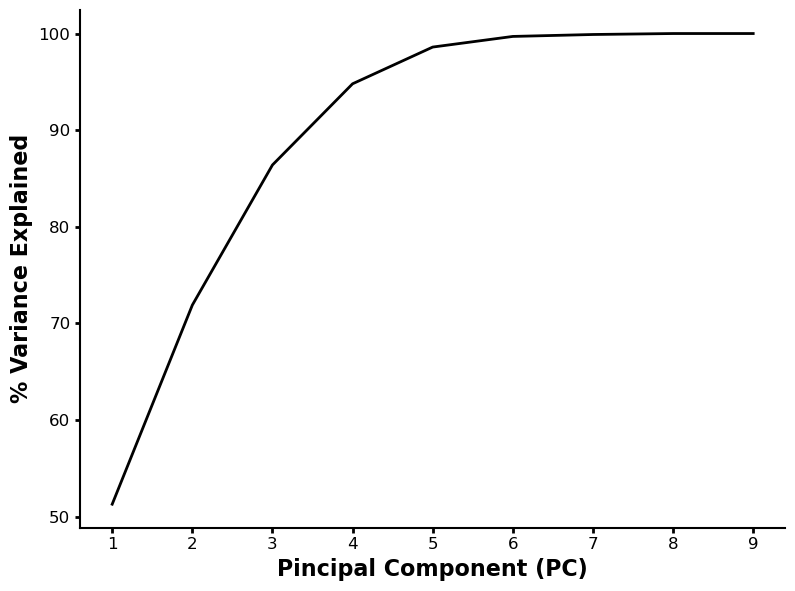

In [21]:
plt.rcParams['axes.linewidth'] = 1.5
plt.figure(figsize=(8,6))
fig, ax = plt.subplots(figsize=(8,6))

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.plot([i+1 for i in range(len(var))],var,'k-',linewidth=2)
plt.xticks([i+1 for i in range(len(var))])
plt.ylabel('% Variance Explained',fontsize=16,fontweight='bold')
plt.xlabel('Pincipal Component (PC)',fontsize=16,fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.tick_params ('both',width=2,labelsize=12)

### Como se puede observar, PC1 y PC2 explican el 72,4 % de la variabilidad. Por lo tanto, podemos graficar PC1 vs PC2 para visualizar la distribución de nuestros compuestos.

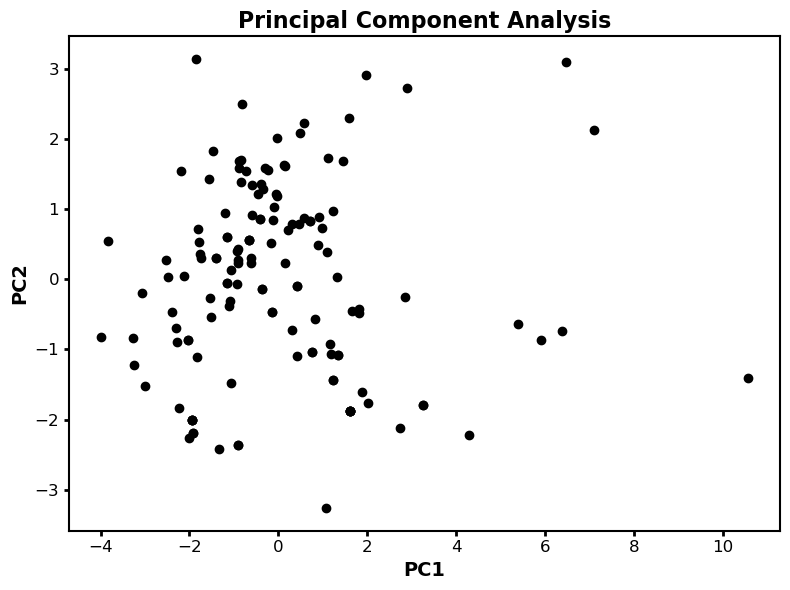

In [22]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(descriptors_pca['PC1'],descriptors_pca['PC2'],'o',color='k')
ax.set_title ('Principal Component Analysis',fontsize=16,fontweight='bold',family='sans-serif')
ax.set_xlabel ('PC1',fontsize=14,fontweight='bold')
ax.set_ylabel ('PC2',fontsize=14,fontweight='bold')

plt.tick_params ('both',width=2,labelsize=12)

plt.tight_layout()
plt.show()

## Agrupamiento K-means e identificación de características principales

### El primer paso para este análisis es reescalar nuestros valores PCA de -1 a 1. Esto se debe a que queremos analizar nuestros datos dentro del ciclo de covarianza de las características (descriptores). Para ello, escribimos:

In [23]:
scale1 = 1.0/(max(descriptors_pca['PC1']) - min(descriptors_pca['PC1']))
scale2 = 1.0/(max(descriptors_pca['PC2']) - min(descriptors_pca['PC2']))

# And we add the new values to our PCA table
descriptors_pca['PC1_normalized']=[i*scale1 for i in descriptors_pca['PC1']]
descriptors_pca['PC2_normalized']=[i*scale2 for i in descriptors_pca['PC2']]

In [24]:
descriptors_pca.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC1_normalized,PC2_normalized
0,0.765680,-1.033949,-0.550291,0.461518,-0.045488,0.228042,0.320645,-0.027523,-0.018017,0.052675,-0.161239
1,-0.124166,0.851835,-0.106684,0.324795,-1.096319,-0.005098,-0.084834,-0.190749,0.049142,-0.008542,0.132839
2,1.124341,1.730709,0.182262,-0.498420,-0.355087,0.411091,0.143898,0.017729,-0.020124,0.077349,0.269895
3,-2.399904,-0.470718,-0.385496,-1.132106,-0.486258,-0.124273,0.121373,-0.007764,0.010340,-0.165101,-0.073406
4,-1.745531,0.302889,-0.492425,0.549056,-0.312210,-0.034066,-0.041890,-0.067726,0.020432,-0.120084,0.047234
5,1.236289,-1.431237,0.902609,0.443033,-0.348081,-0.215531,-0.130209,-0.136556,0.023170,0.085050,-0.223194
6,-3.056103,-0.192132,-0.596280,-1.578387,-0.447184,0.080362,0.304215,0.058557,-0.006005,-0.210245,-0.029962
7,2.902620,2.737097,0.726788,0.753279,-0.524019,0.400816,0.124046,0.037228,-0.035178,0.199686,0.426836
8,-2.132801,0.046645,0.106303,-2.007337,-0.719861,-0.020975,0.073609,0.101073,-0.015701,-0.146726,0.007274
9,0.903960,0.888381,-0.607571,-0.487584,0.350692,-0.273461,-0.143439,-0.025626,-0.007573,0.062188,0.138539


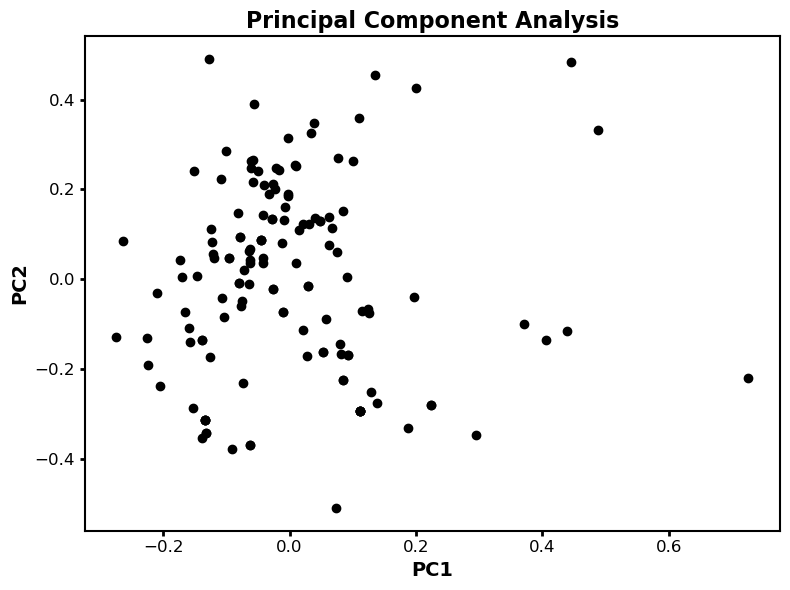

In [25]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(descriptors_pca['PC1_normalized'],descriptors_pca['PC2_normalized'],'o',color='k')
ax.set_title ('Principal Component Analysis',fontsize=16,fontweight='bold',family='sans-serif')
ax.set_xlabel ('PC1',fontsize=14,fontweight='bold')
ax.set_ylabel ('PC2',fontsize=14,fontweight='bold')

plt.tick_params ('both',width=2,labelsize=12)

plt.tight_layout()
plt.show()

#### Como puede ver, la distribución de los puntos es la misma que antes, sin embargo, la escala ahora es de -1 a 1.

## Agrupamiento k-means
### El algoritmo de agrupamiento K-means requiere que el usuario defina el número de clústeres. Sin embargo, para seleccionar matemáticamente dicho número para un grupo de puntos según su distribución, se pueden aplicar otros algoritmos. Por ejemplo, utilizaremos el algoritmo de silueta para identificar el número óptimo de clústeres para nuestra distribución. Puede encontrar más información sobre el algoritmo de silueta aquí y aquí.

C:\Users\Usuario X\anaconda3\envs\chem_env\lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
C:\Users\Usuario X\anaconda3\envs\chem_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.4436441918109408


C:\Users\Usuario X\anaconda3\envs\chem_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Usuario X\anaconda3\envs\chem_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Usuario X\anaconda3\envs\chem_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.36537420354736916
For n_clusters = 4 The average silhouette_score is : 0.3735465204435028
For n_clusters = 5 The average silhouette_score is : 0.35049595253681953


C:\Users\Usuario X\anaconda3\envs\chem_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Usuario X\anaconda3\envs\chem_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.39933108475256923
For n_clusters = 7 The average silhouette_score is : 0.3896917294198449


C:\Users\Usuario X\anaconda3\envs\chem_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Usuario X\anaconda3\envs\chem_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.41671231330367153
For n_clusters = 9 The average silhouette_score is : 0.4141632676170003


C:\Users\Usuario X\anaconda3\envs\chem_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 10 The average silhouette_score is : 0.4235814985665598


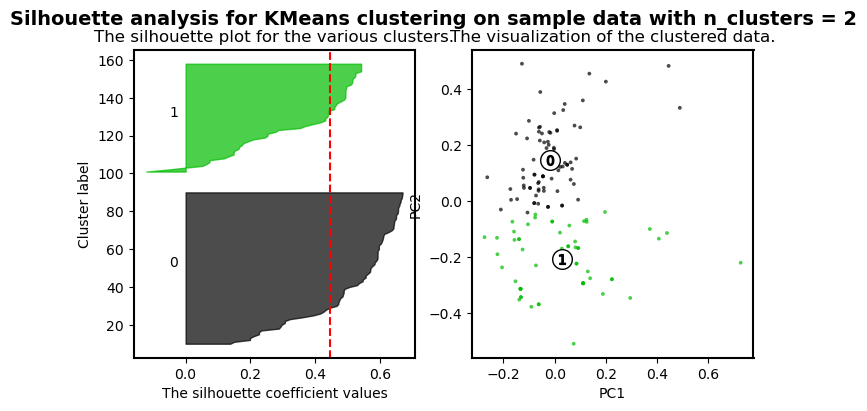

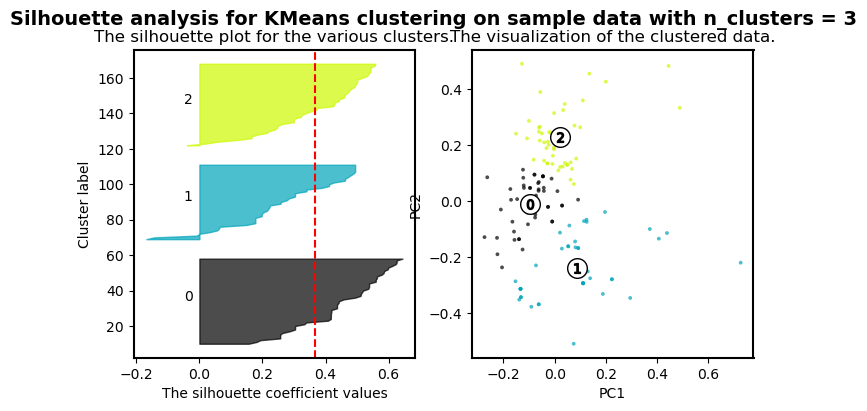

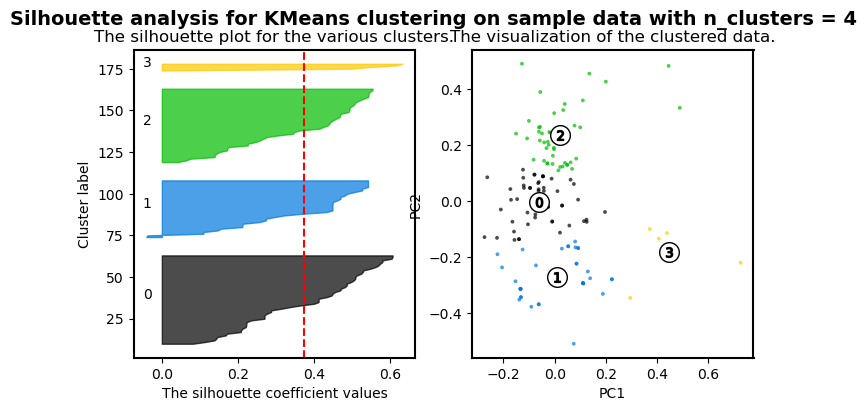

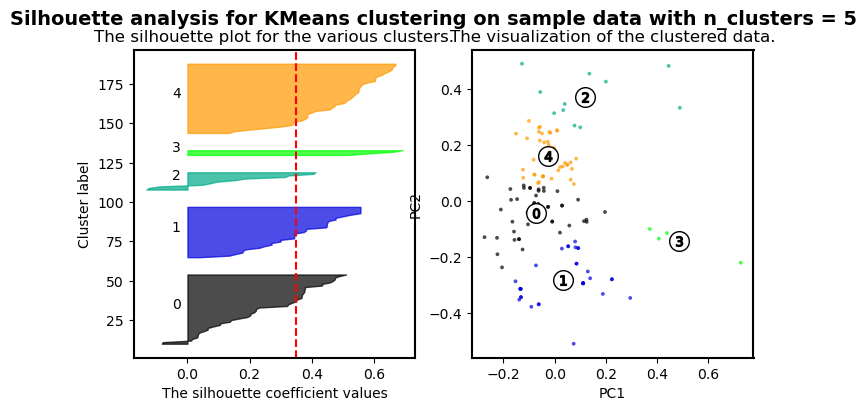

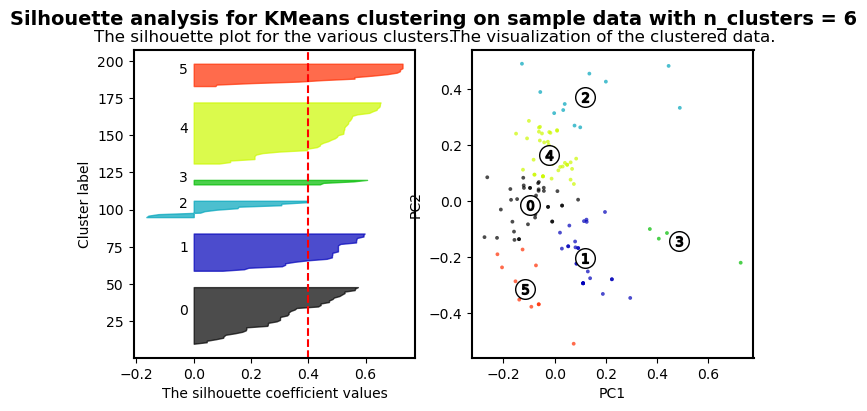

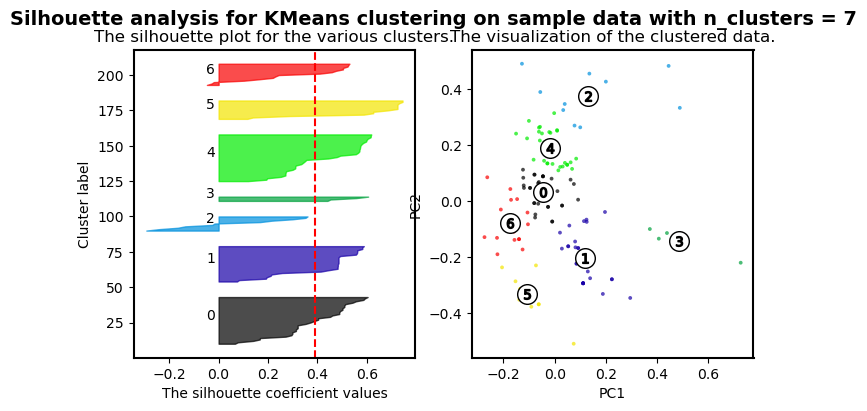

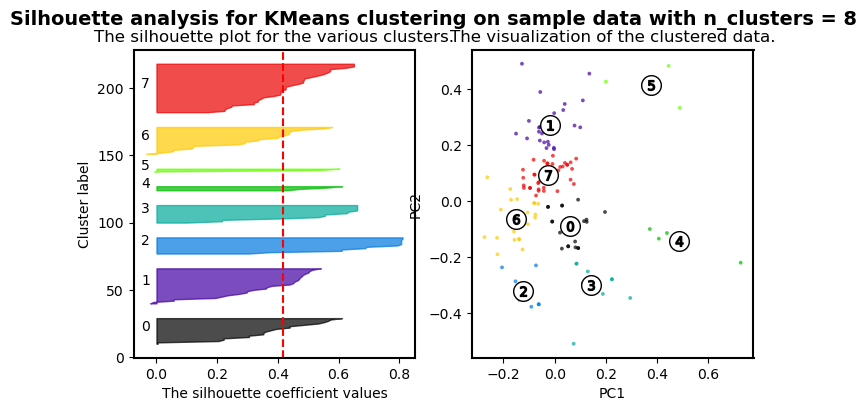

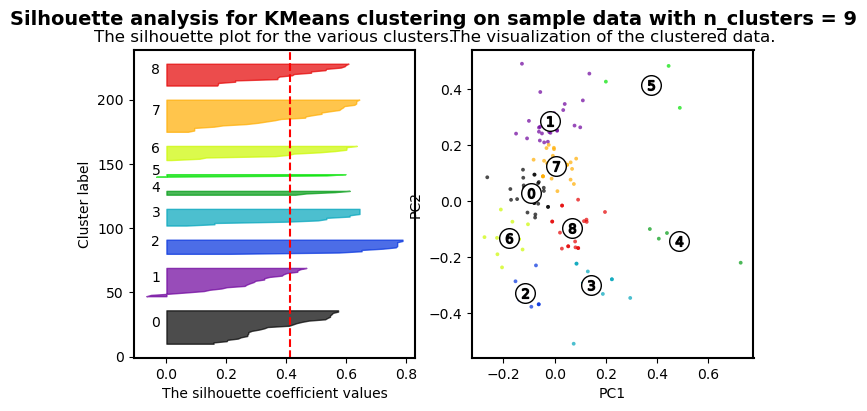

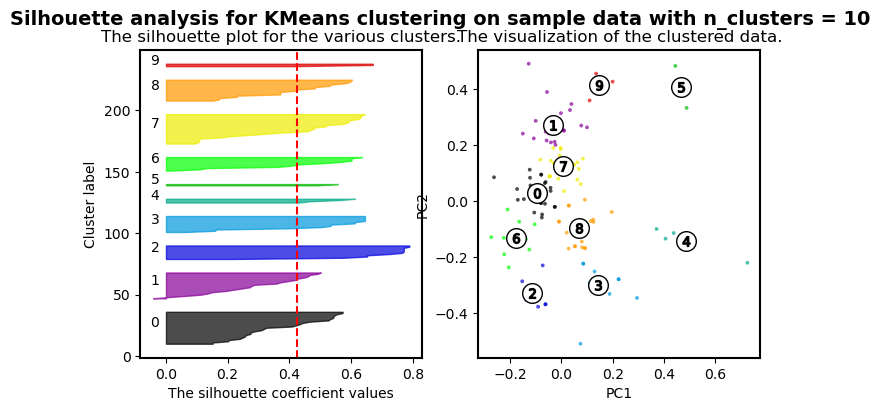

In [26]:
range_n_clusters = [2, 3, 4, 5, 6, 7,8,9,10]
for n_clusters in range_n_clusters:
    fig, (ax1,ax2)= plt.subplots(1, 2)
    fig.set_size_inches(8, 4)

    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(descriptors_pca[['PC1_normalized','PC2_normalized']])
    silhouette_avg = silhouette_score(descriptors_pca[['PC1_normalized','PC2_normalized']], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(descriptors_pca[['PC1_normalized','PC2_normalized']], cluster_labels)

    y_lower = 10

    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")


    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(descriptors_pca['PC1_normalized'], descriptors_pca['PC2_normalized'],
                marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')


    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC1")
    ax2.set_ylabel("PC2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')


plt.show()

In [27]:
kmeans = KMeans(n_clusters=2, random_state=10) # We define the best number of clusters
clusters = kmeans.fit(descriptors_pca[['PC1_normalized','PC2_normalized']]) #PC1 vs PC2 (normalized values)

C:\Users\Usuario X\anaconda3\envs\chem_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [29]:
descriptors_pca['Cluster_PC1_PC2'] = clusters.labels_

In [30]:
descriptors_pca.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC1_normalized,PC2_normalized,Cluster_PC1_PC2
0,0.765680,-1.033949,-0.550291,0.461518,-0.045488,0.228042,0.320645,-0.027523,-0.018017,0.052675,-0.161239,1
1,-0.124166,0.851835,-0.106684,0.324795,-1.096319,-0.005098,-0.084834,-0.190749,0.049142,-0.008542,0.132839,0
2,1.124341,1.730709,0.182262,-0.498420,-0.355087,0.411091,0.143898,0.017729,-0.020124,0.077349,0.269895,0
3,-2.399904,-0.470718,-0.385496,-1.132106,-0.486258,-0.124273,0.121373,-0.007764,0.010340,-0.165101,-0.073406,1
4,-1.745531,0.302889,-0.492425,0.549056,-0.312210,-0.034066,-0.041890,-0.067726,0.020432,-0.120084,0.047234,0
5,1.236289,-1.431237,0.902609,0.443033,-0.348081,-0.215531,-0.130209,-0.136556,0.023170,0.085050,-0.223194,1
6,-3.056103,-0.192132,-0.596280,-1.578387,-0.447184,0.080362,0.304215,0.058557,-0.006005,-0.210245,-0.029962,0
7,2.902620,2.737097,0.726788,0.753279,-0.524019,0.400816,0.124046,0.037228,-0.035178,0.199686,0.426836,0
8,-2.132801,0.046645,0.106303,-2.007337,-0.719861,-0.020975,0.073609,0.101073,-0.015701,-0.146726,0.007274,0
9,0.903960,0.888381,-0.607571,-0.487584,0.350692,-0.273461,-0.143439,-0.025626,-0.007573,0.062188,0.138539,0


## Ahora todo junto
Graficaremos los datos de PC1 frente a PC2. Cada clúster tendrá un color diferente y encontraremos la característica principal de cada componente principal.

<Figure size 1000x800 with 0 Axes>

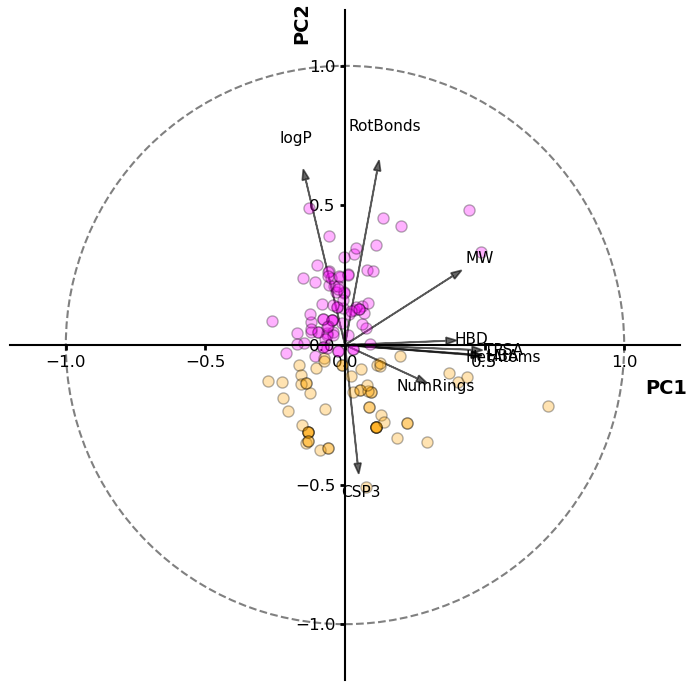

In [33]:
plt.rcParams['axes.linewidth'] = 1.5
plt.figure(figsize=(10,8))

fig, ax = plt.subplots(figsize=(7,7))

color_code={ 0:        'magenta',
             1.0:   'orange',
             2.0:      'cyan',
             3.0:           'c',
             4.0:        'm',
             5.0:        'y',
             6.0:        'darkorange',
             7.0:       'k',
             8.0:    'yellow',
             }

for i in descriptors_pca.index:
        ax.plot(descriptors_pca.loc[i].at['PC1_normalized'],descriptors_pca.loc[i].at['PC2_normalized'],
                    c=color_code[descriptors_pca.loc[i].at['Cluster_PC1_PC2']],
                    marker='o',markersize=8,markeredgecolor='k',alpha=0.3)


plt.xlabel ('PC1',fontsize=14,fontweight='bold')
ax.xaxis.set_label_coords(0.98, 0.45)
plt.ylabel ('PC2',fontsize=14,fontweight='bold')
ax.yaxis.set_label_coords(0.45, 0.98)
plt.tick_params ('both',width=2,labelsize=12)
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

lab=['MW','HBA', 'HBD', 'logP', 'TPSA', 'CSP3','NumRings', 'HetAtoms', 'RotBonds']#Feature labels

l=np.transpose(pca.components_[0:2, :]) ## We will get the components eigenvectors (main features) for PC1 and PC2

n = l.shape[0]
for i in range(n):
    plt.arrow(0, 0, l[i,0], l[i,1],color= 'k',alpha=0.6,linewidth=1.2,head_width=0.025)
    plt.text(l[i,0]*1.25, l[i,1]*1.25, lab[i], color = 'k',va = 'center', ha = 'center',fontsize=11)

circle = plt.Circle((0,0), 1, color='gray', fill=False,clip_on=True,linewidth=1.5,linestyle='--')
ax.add_artist(circle)
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)
plt.tight_layout()
plt.show()